In [1]:
#Verify NVIDIA GPU Availability

!nvidia-smi

Fri Feb 13 05:00:41 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

> Install the YOLO

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.0 MB/s eta 0:00:00


In [2]:
import ultralytics

ultralytics.checks()

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.9/112.6 GB disk)


> Import Dataset From Roboflow: Cat Breeds

dataset link: https://universe.roboflow.com/philippine-cat-breeds/cat-breeds-fzcip/dataset/3/download/yolov12

Store data into a specific directory

In [4]:
%pwd

'/content'

In [5]:
!mkdir CatBreedsDetection

mkdir: cannot create directory ‘CatBreedsDetection’: File exists


In [6]:
!ls

CatBreedsDetection


In [7]:
path = "/content/CatBreedsDetection"

Now , change the directory from content to CatBreedsDetection in which we do all the processes.

In [8]:
%pwd

'/content'

In [9]:
import os

os.chdir(path)  #change the directory directly

In [10]:
%pwd

'/content/CatBreedsDetection'

Here, we import dataset in the currect directory = CatBreedsDetection.

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MW5HE7ZZxqr3eOxhqYbq")
project = rf.workspace("philippine-cat-breeds").project("cat-breeds-fzcip")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 144.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.13.0.92
    Uninstalling opencv-python-headless-4.13.0.92:
      Successfully uninstalled opencv-python-headless-4.13.0.92
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cat-Breeds-3 in yolov8:: 100%|██████████| 6346/6346 [00:00<00:00, 8111.79it/s]


This is the structure of YOLO file:

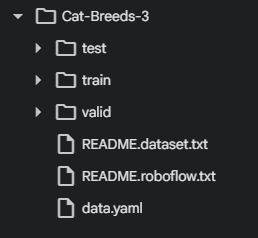

> Train the YOLOv8 over a Custom Dataset

In [11]:
os.chdir("/content/CatBreedsDetection/Cat-Breeds-3")

**NOTE:**

Before running the below syntax , update the data.yaml file by pasting the path of images folders for test , train and valid

In [12]:
!yolo task=detect mode = train model=yolov8n.pt data = data.yaml epochs=10 imgsz=640 batch=16

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

>Display Some of the content we obtained

In [13]:
!ls '/content/CatBreedsDetection/Cat-Breeds-3/runs/detect/train'

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


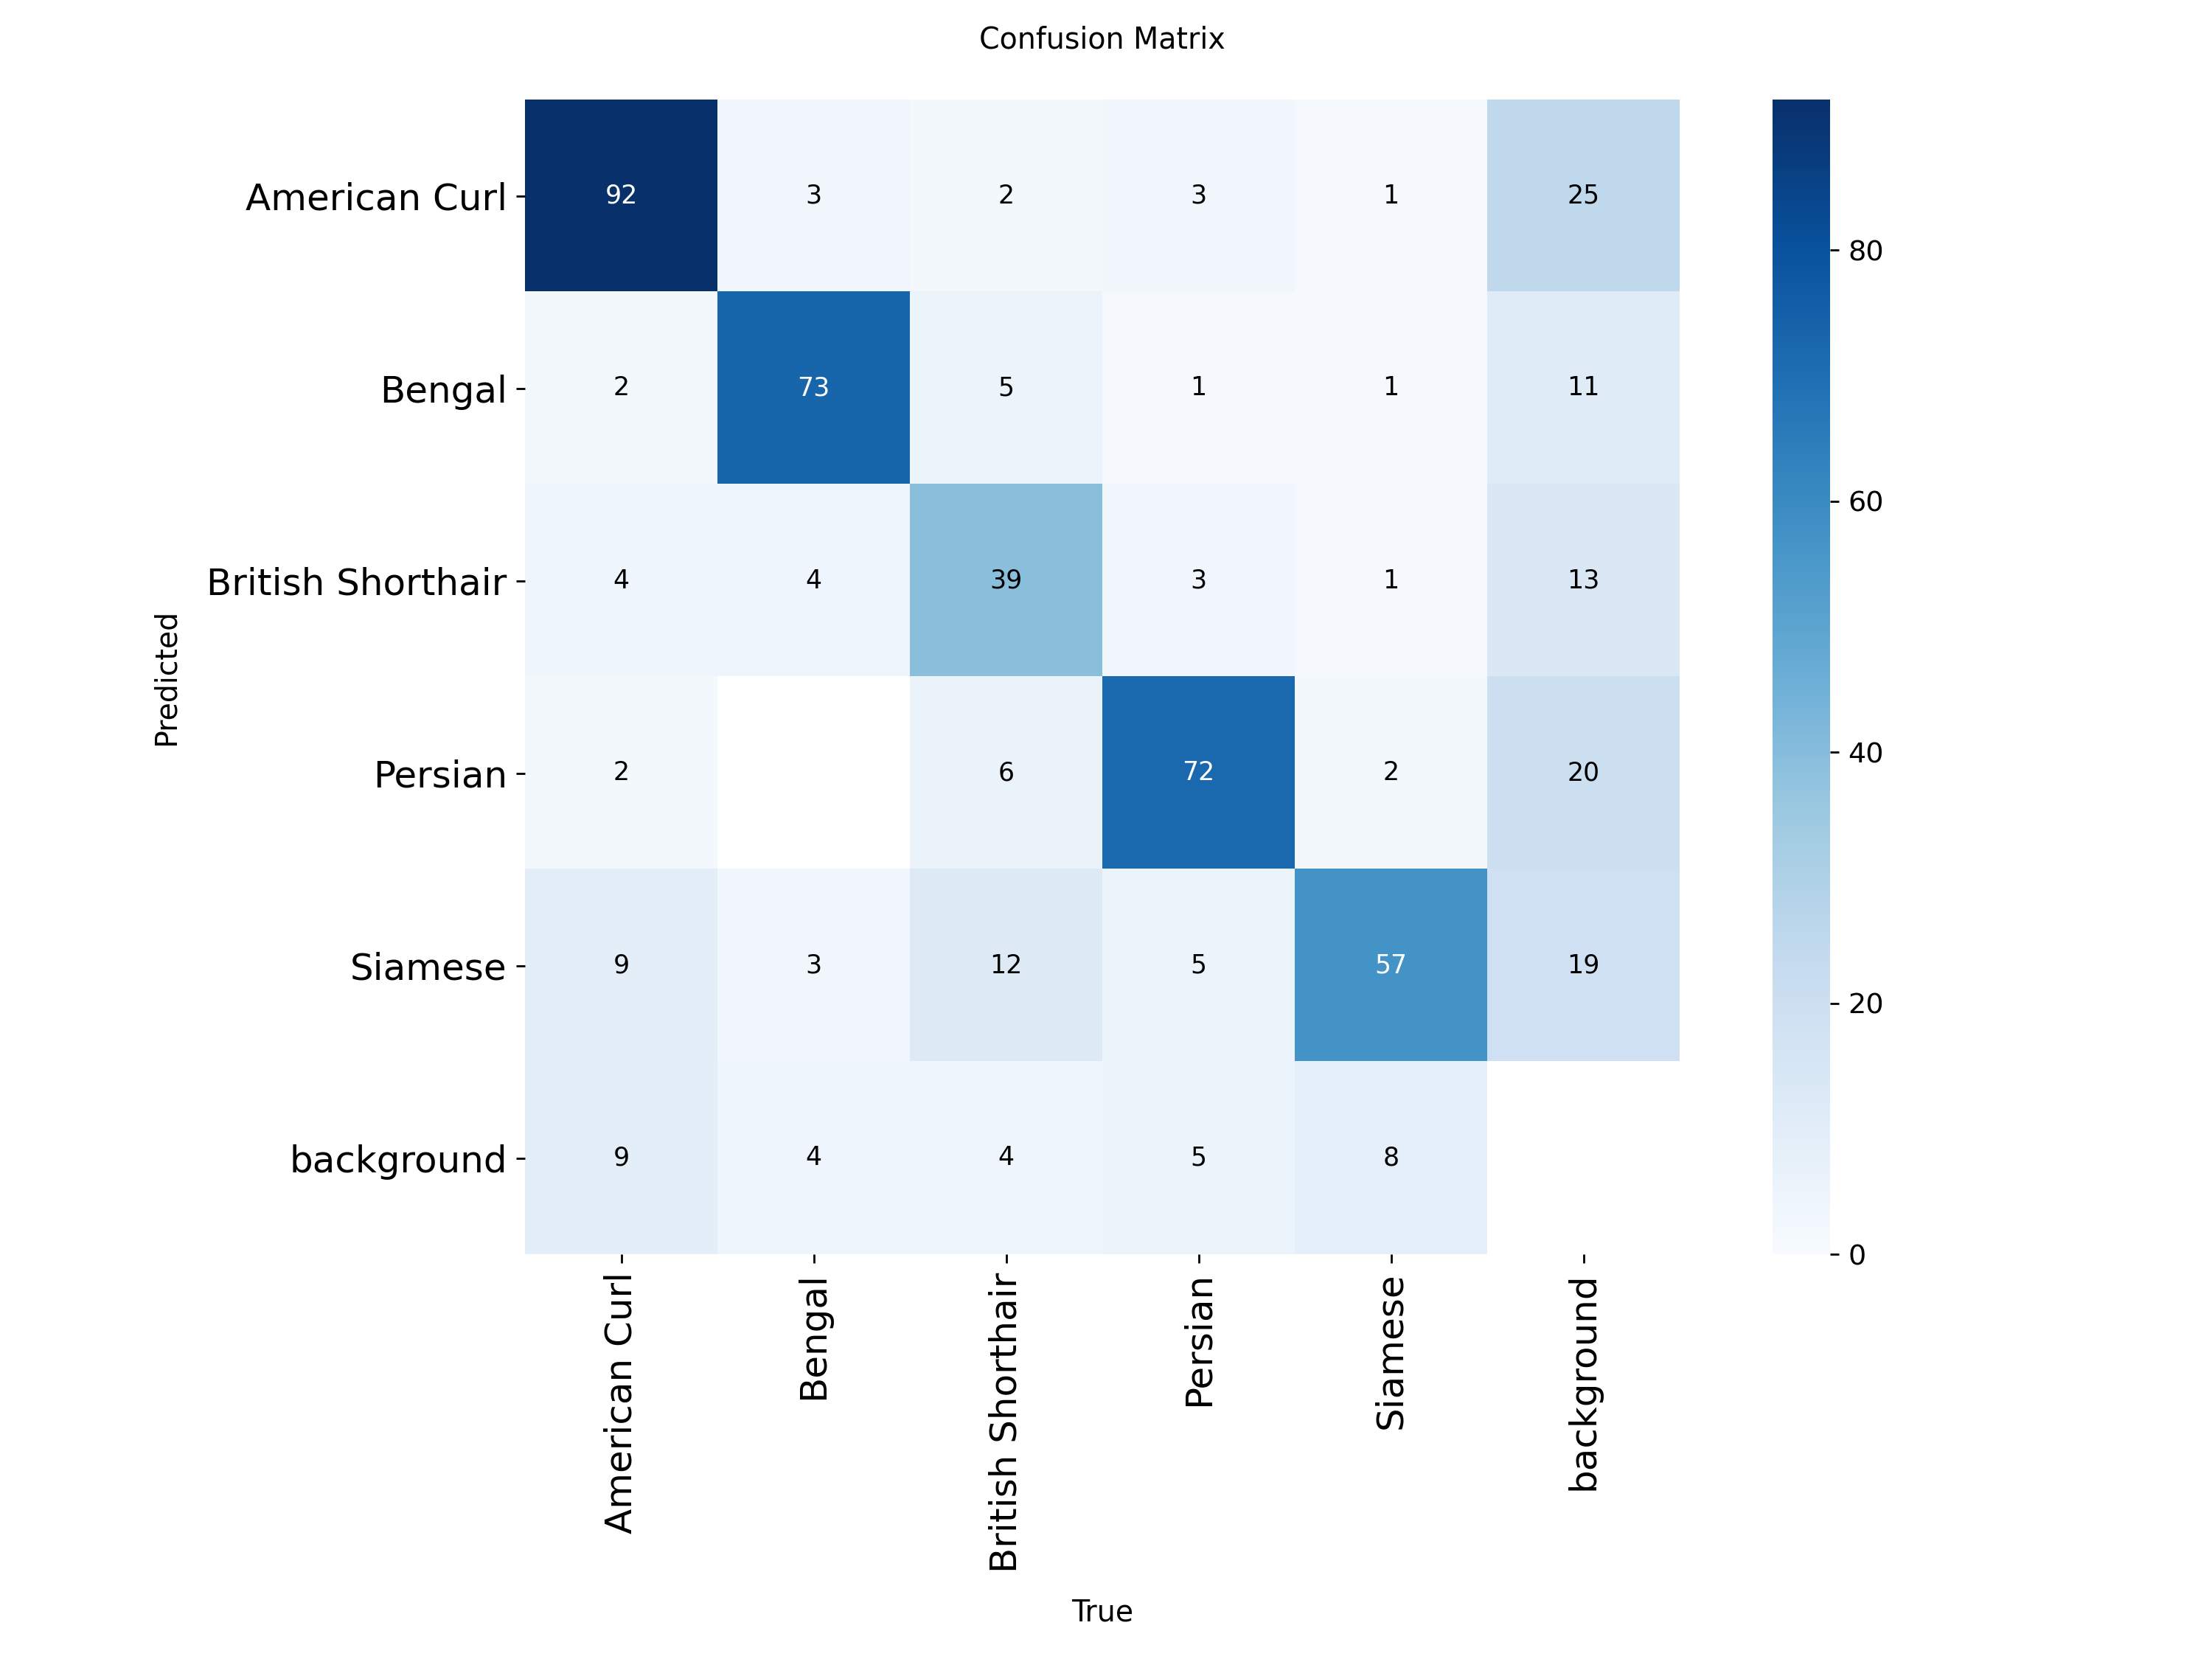

In [15]:
resultData = "/content/CatBreedsDetection/Cat-Breeds-3/runs/detect/train/"

from IPython.display import Image , display

Image(filename = f'{resultData}confusion_matrix.png')

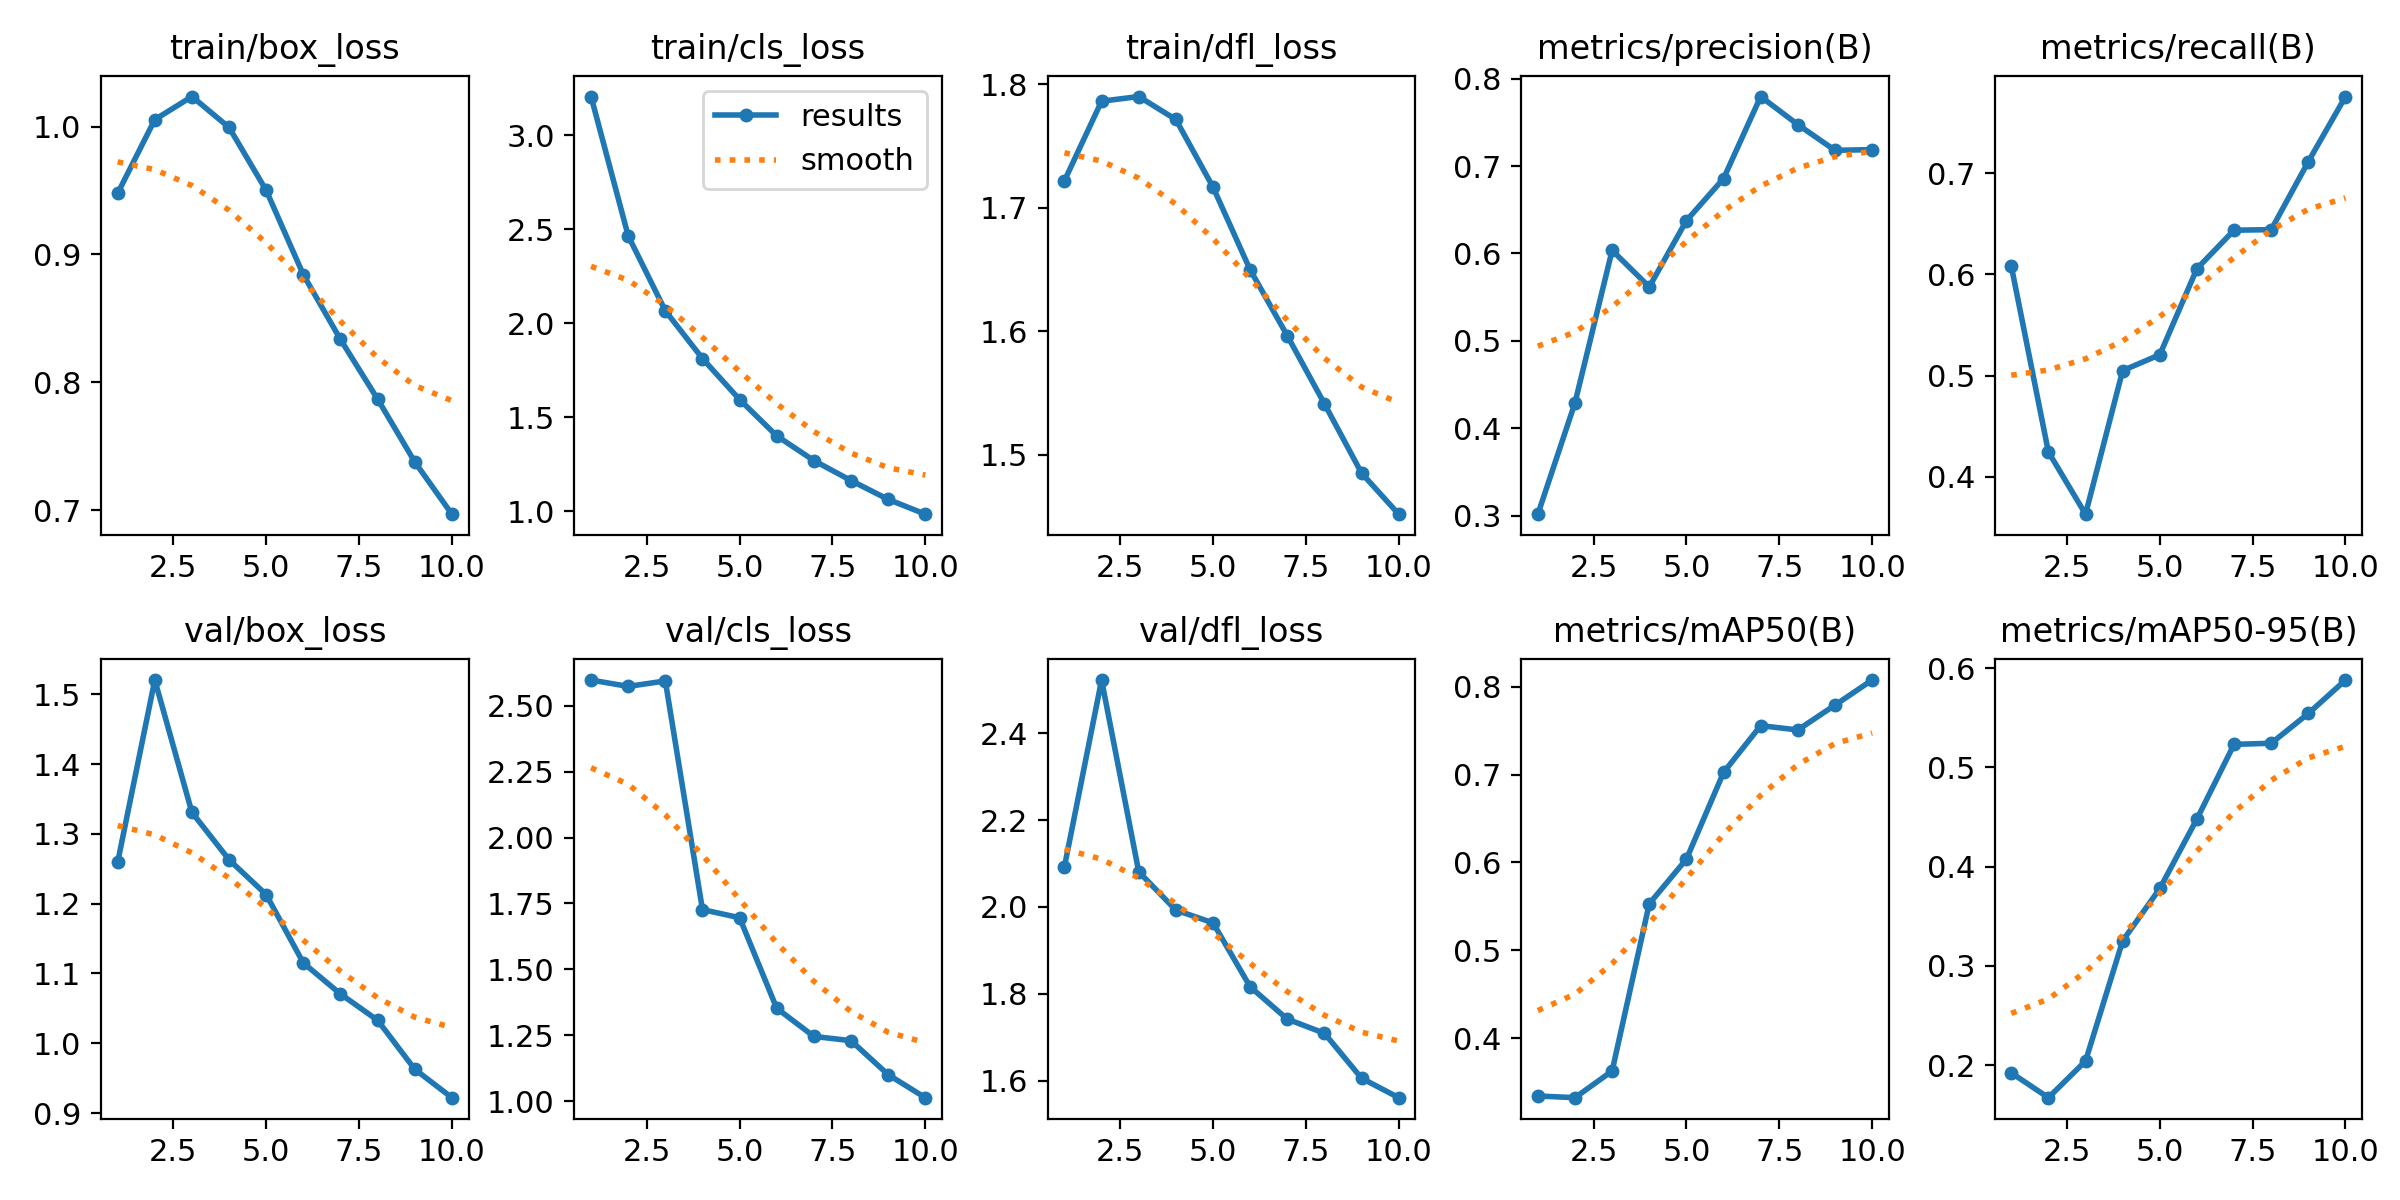

In [16]:
Image(filename = f'{resultData}results.png')

In [17]:
import pandas as pd

df = pd.read_csv(f'{resultData}results.csv')

print(df.head(5))

   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   46.1655         0.94785         3.20567         1.72184   
1      2   87.1112         1.00549         2.46511         1.78619   
2      3  128.2840         1.02352         2.06637         1.78996   
3      4  169.4630         0.99934         1.81251         1.77139   
4      5  210.5980         0.95016         1.59439         1.71666   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.30164            0.60839           0.33435   
1               0.42911            0.42474           0.33243   
2               0.60349            0.36330           0.36278   
3               0.56168            0.50502           0.55296   
4               0.63750            0.52068           0.60371   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.19232       1.25940       2.59709       2.09288  0.000368   
1              0.16728       1.52058  

In [18]:
print(df.tail(1))

   epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
9     10  413.669          0.6969         0.98492         1.45195   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
9               0.71872             0.7755           0.80745   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
9              0.58807       0.92198        1.0135       1.56071  0.000121   

     lr/pg1    lr/pg2  
9  0.000121  0.000121  


> Test your model on any arbitrary video or image.

In [20]:
%pwd

'/content/CatBreedsDetection/Cat-Breeds-3'

In [22]:
os.chdir("/content")

In [23]:
%pwd

'/content'

In [24]:
!mkdir ManualTestingData

In [25]:
!ls

CatBreedsDetection  ManualTestingData


In [26]:
os.chdir("/content/ManualTestingData")

In [27]:
%pwd

'/content/ManualTestingData'

In [28]:
URL = "https://drive.google.com/file/d/12nncU8L16KIcGt6vVBixAsYOTl1FaWYI/view?usp=sharing"

id = "12nncU8L16KIcGt6vVBixAsYOTl1FaWYI"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=12nncU8L16KIcGt6vVBixAsYOTl1FaWYI' -O Siamese.jpg

--2026-02-13 06:03:12--  https://docs.google.com/uc?export=download&id=12nncU8L16KIcGt6vVBixAsYOTl1FaWYI
Resolving docs.google.com (docs.google.com)... 142.251.2.138, 142.251.2.100, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12nncU8L16KIcGt6vVBixAsYOTl1FaWYI&export=download [following]
--2026-02-13 06:03:12--  https://drive.usercontent.google.com/download?id=12nncU8L16KIcGt6vVBixAsYOTl1FaWYI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5803 (5.7K) [image/jpeg]
Saving to: ‘Siamese.jpg’

Siamese.jpg         100%[===================>]   5.67K  --.-KB/s    in 0s      

2026-02-13

In [29]:
URL = "https://drive.google.com/file/d/13SruuN0pnDsUS0T5GSjGuMByxST0g6Ya/view?usp=sharing"

id = "13SruuN0pnDsUS0T5GSjGuMByxST0g6Ya"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=13SruuN0pnDsUS0T5GSjGuMByxST0g6Ya' -O american_curl.jpg

--2026-02-13 06:05:14--  https://docs.google.com/uc?export=download&id=13SruuN0pnDsUS0T5GSjGuMByxST0g6Ya
Resolving docs.google.com (docs.google.com)... 142.251.2.102, 142.251.2.138, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=13SruuN0pnDsUS0T5GSjGuMByxST0g6Ya&export=download [following]
--2026-02-13 06:05:14--  https://drive.usercontent.google.com/download?id=13SruuN0pnDsUS0T5GSjGuMByxST0g6Ya&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6123 (6.0K) [image/jpeg]
Saving to: ‘american_curl.jpg’

american_curl.jpg   100%[===================>]   5.98K  --.-KB/s    in 0s      

2026

In [30]:
URL = "https://drive.google.com/file/d/19QanXgEo5cMBVNjiCYTvKTiiJ5zTrlbn/view?usp=sharing"

id = "19QanXgEo5cMBVNjiCYTvKTiiJ5zTrlbn"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19QanXgEo5cMBVNjiCYTvKTiiJ5zTrlbn' -O bengal_cat.jpg

--2026-02-13 06:06:46--  https://docs.google.com/uc?export=download&id=19QanXgEo5cMBVNjiCYTvKTiiJ5zTrlbn
Resolving docs.google.com (docs.google.com)... 74.125.137.138, 74.125.137.100, 74.125.137.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19QanXgEo5cMBVNjiCYTvKTiiJ5zTrlbn&export=download [following]
--2026-02-13 06:06:46--  https://drive.usercontent.google.com/download?id=19QanXgEo5cMBVNjiCYTvKTiiJ5zTrlbn&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34993 (34K) [image/jpeg]
Saving to: ‘bengal_cat.jpg’

bengal_cat.jpg      100%[===================>]  34.17K  --.-KB/s    in 0.005s  

202

In [31]:
URL = "https://drive.google.com/file/d/15mRSfDsxNthpKDRMHvPYyvubmyxQu2ws/view?usp=sharing"

id = "15mRSfDsxNthpKDRMHvPYyvubmyxQu2ws"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=15mRSfDsxNthpKDRMHvPYyvubmyxQu2ws' -O british.jpg

--2026-02-13 06:07:50--  https://docs.google.com/uc?export=download&id=15mRSfDsxNthpKDRMHvPYyvubmyxQu2ws
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.113, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15mRSfDsxNthpKDRMHvPYyvubmyxQu2ws&export=download [following]
--2026-02-13 06:07:50--  https://drive.usercontent.google.com/download?id=15mRSfDsxNthpKDRMHvPYyvubmyxQu2ws&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5370 (5.2K) [image/jpeg]
Saving to: ‘british.jpg’

british.jpg         100%[===================>]   5.24K  --.-KB/s    in 0s      

2026-02-13

In [32]:
URL = "https://drive.google.com/file/d/1kwdlvv5nIzrchY6tmqDcHB6ldKR45U95/view?usp=sharing"

id = "1kwdlvv5nIzrchY6tmqDcHB6ldKR45U95"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kwdlvv5nIzrchY6tmqDcHB6ldKR45U95' -O persian_orange.jpg

--2026-02-13 06:08:59--  https://docs.google.com/uc?export=download&id=1kwdlvv5nIzrchY6tmqDcHB6ldKR45U95
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1kwdlvv5nIzrchY6tmqDcHB6ldKR45U95&export=download [following]
--2026-02-13 06:08:59--  https://drive.usercontent.google.com/download?id=1kwdlvv5nIzrchY6tmqDcHB6ldKR45U95&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22577 (22K) [image/jpeg]
Saving to: ‘persian_orange.jpg’

persian_orange.jpg  100%[===================>]  22.05K  --.-KB/s    in 0.001s  

202

In [33]:
URL = "https://drive.google.com/file/d/1GcJgWH0TKxm9WN8RIOdDhulGGKgbQM1j/view?usp=sharing"

id = "1GcJgWH0TKxm9WN8RIOdDhulGGKgbQM1j"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GcJgWH0TKxm9WN8RIOdDhulGGKgbQM1j' -O persian.jpg

--2026-02-13 06:09:58--  https://docs.google.com/uc?export=download&id=1GcJgWH0TKxm9WN8RIOdDhulGGKgbQM1j
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.113, 142.251.2.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GcJgWH0TKxm9WN8RIOdDhulGGKgbQM1j&export=download [following]
--2026-02-13 06:09:58--  https://drive.usercontent.google.com/download?id=1GcJgWH0TKxm9WN8RIOdDhulGGKgbQM1j&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26337 (26K) [image/jpeg]
Saving to: ‘persian.jpg’

persian.jpg         100%[===================>]  25.72K  --.-KB/s    in 0.001s  

2026-02-13

In [34]:
URL = "https://drive.google.com/file/d/12Vd3HCbsG6U2A-zzvaI2HRLmjp2BY71q/view?usp=sharing"

id = "12Vd3HCbsG6U2A-zzvaI2HRLmjp2BY71q"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=12Vd3HCbsG6U2A-zzvaI2HRLmjp2BY71q' -O video1.mp4

--2026-02-13 06:11:03--  https://docs.google.com/uc?export=download&id=12Vd3HCbsG6U2A-zzvaI2HRLmjp2BY71q
Resolving docs.google.com (docs.google.com)... 74.125.137.139, 74.125.137.101, 74.125.137.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=12Vd3HCbsG6U2A-zzvaI2HRLmjp2BY71q&export=download [following]
--2026-02-13 06:11:03--  https://drive.usercontent.google.com/download?id=12Vd3HCbsG6U2A-zzvaI2HRLmjp2BY71q&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61398888 (59M) [video/mp4]
Saving to: ‘video1.mp4’

video1.mp4          100%[===================>]  58.55M  32.4MB/s    in 1.8s    

2026-

In [35]:
URL = "https://drive.google.com/file/d/1vhO7iBO5K00zBXoqmOElyAGcSvHtRjjP/view?usp=sharing"

id = "1vhO7iBO5K00zBXoqmOElyAGcSvHtRjjP"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vhO7iBO5K00zBXoqmOElyAGcSvHtRjjP' -O video2.mp4

--2026-02-13 06:11:49--  https://docs.google.com/uc?export=download&id=1vhO7iBO5K00zBXoqmOElyAGcSvHtRjjP
Resolving docs.google.com (docs.google.com)... 74.125.137.101, 74.125.137.100, 74.125.137.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vhO7iBO5K00zBXoqmOElyAGcSvHtRjjP&export=download [following]
--2026-02-13 06:11:49--  https://drive.usercontent.google.com/download?id=1vhO7iBO5K00zBXoqmOElyAGcSvHtRjjP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98970554 (94M) [application/octet-stream]
Saving to: ‘video2.mp4’

video2.mp4          100%[===================>]  94.38M  33.3MB/s    in 

> Predict the cat breeds

In [19]:
weightsPath = "/content/CatBreedsDetection/Cat-Breeds-3/runs/detect/train/weights"

In [36]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'Siamese.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/Siamese.jpg: 640x640 2 Siameses, 8.7ms
Speed: 4.7ms preprocess, 8.7ms inference, 15.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ManualTestingData/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [37]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'american_curl.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/american_curl.jpg: 448x640 1 American Curl, 74.6ms
Speed: 7.9ms preprocess, 74.6ms inference, 21.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/ManualTestingData/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [38]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'bengal_cat.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/bengal_cat.jpg: 448x640 1 Bengal, 46.8ms
Speed: 3.8ms preprocess, 46.8ms inference, 16.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/ManualTestingData/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [39]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'british.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/british.jpg: 640x640 1 British Shorthair, 11.2ms
Speed: 4.7ms preprocess, 11.2ms inference, 17.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/ManualTestingData/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [40]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'persian.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/persian.jpg: 448x640 1 American Curl, 45.0ms
Speed: 4.0ms preprocess, 45.0ms inference, 16.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/ManualTestingData/runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [41]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'persian_orange.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/persian_orange.jpg: 640x480 1 Persian, 45.8ms
Speed: 3.9ms preprocess, 45.8ms inference, 17.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/ManualTestingData/runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [42]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'video1.mp4'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 47.9ms
video 1/1 (frame 2/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 7.6ms
video 1/1 (frame 3/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 8.3ms
video 1/1 (frame 4/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 7.3ms
video 1/1 (frame 5/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 8.4ms
video 1/1 (frame 6/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 7.6ms
video 1/1 (frame 7/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 8.5ms
video 1/1 (frame 8/984) /content/ManualTestingData/video1.mp4: 384x640 2 American Curls, 8.6ms
video 1/1 (frame 9/984) /content/ManualTestingData/video1.mp4: 384x640 2 Ame

In [43]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'video2.mp4'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 48.2ms
video 1/1 (frame 2/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 9.4ms
video 1/1 (frame 3/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 9.7ms
video 1/1 (frame 4/420) /content/ManualTestingData/video2.mp4: 384x640 2 Persians, 8.9ms
video 1/1 (frame 5/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 13.6ms
video 1/1 (frame 6/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 9.0ms
video 1/1 (frame 7/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 15.6ms
video 1/1 (frame 8/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 16.5ms
video 1/1 (frame 9/420) /content/ManualTestingData/video2.mp4: 384x640 1 Persian, 16.6ms
video 1/1 (frame 10/420) /content/Manua

> Download from google collab

In [45]:

from google.colab import files

files.download('/content/ManualTestingData/runs/detect/predict/Siamese.jpg')
files.download('/content/ManualTestingData/runs/detect/predict2/american_curl.jpg')
files.download('/content/ManualTestingData/runs/detect/predict3/bengal_cat.jpg')
files.download('/content/ManualTestingData/runs/detect/predict4/british.jpg')
files.download('/content/ManualTestingData/runs/detect/predict5/persian.jpg')
files.download('/content/ManualTestingData/runs/detect/predict6/persian_orange.jpg')
files.download('/content/ManualTestingData/runs/detect/predict7/video1.avi')
files.download('/content/ManualTestingData/runs/detect/predict8/video2.avi')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
url = "https://drive.google.com/file/d/1ZcMQ_-Z-x4WW6INDwVHt3b-9_JE8sVP7/view?usp=sharing"

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZcMQ_-Z-x4WW6INDwVHt3b-9_JE8sVP7' -O multi_cat.jpg

--2026-02-13 06:32:41--  https://docs.google.com/uc?export=download&id=1ZcMQ_-Z-x4WW6INDwVHt3b-9_JE8sVP7
Resolving docs.google.com (docs.google.com)... 142.250.101.102, 142.250.101.101, 142.250.101.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZcMQ_-Z-x4WW6INDwVHt3b-9_JE8sVP7&export=download [following]
--2026-02-13 06:32:41--  https://drive.usercontent.google.com/download?id=1ZcMQ_-Z-x4WW6INDwVHt3b-9_JE8sVP7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 288870 (282K) [image/jpeg]
Saving to: ‘multi_cat.jpg’

multi_cat.jpg       100%[===================>] 282.10K  --.-KB/s    in 0.06s   

In [47]:
!yolo task=detect mode=predict model={weightsPath}/best.pt conf=0.25 source = 'multi_cat.jpg'

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/ManualTestingData/multi_cat.jpg: 384x640 (no detections), 43.1ms
Speed: 2.9ms preprocess, 43.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/ManualTestingData/runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [48]:
files.download('/content/ManualTestingData/runs/detect/predict9/multi_cat.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>